In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline 

plt.set_cmap('gray')

ModuleNotFoundError: No module named 'tensorflow'

## Data Preprocessing

In [ ]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()

In [46]:
print(train_data.shape)
print(train_label.shape)
print("=" * 30)

print(test_data.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


2


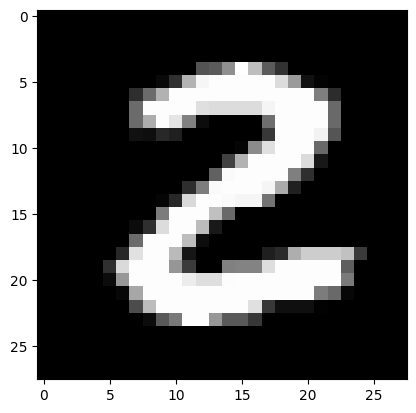

In [47]:
index = 25
plt.imshow(train_data[index])
print(train_label[index])

0


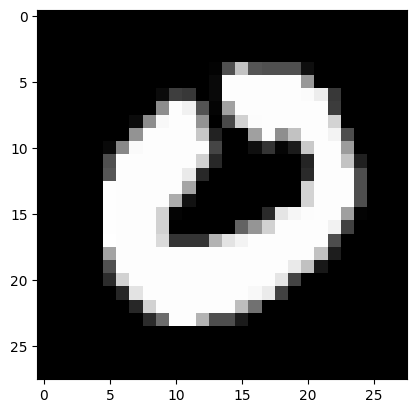

In [48]:
index = 25
plt.imshow(test_data[index])
print(test_label[index])

In [49]:
train_data = train_data.astype('float') / 255.0
train_data = train_data.reshape(-1, 28*28)
test_data = test_data.astype('float') / 255.0
test_data = test_data.reshape(-1, 28*28)


In [71]:
train_label = to_categorical(train_label)

In [66]:
test_label = to_categorical(test_label)

In [70]:
test_label[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Model Building

In [43]:
# model = Sequential([
#     Dense(units=512, activation='relu', input_shape=(28*28)),
#     Dense(units=512, activation='relu'),
#     Dense(units=10, activation='softmax')
# ])

model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model.compile(
    loss=CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [74]:
history = model.fit(train_data, train_label, epochs=5, batch_size=32)

Epoch 1/5


2024-07-12 10:44:36.078300: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.0232 - accuracy: 0.9939
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0166 - accuracy: 0.9953
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0169 - accuracy: 0.9953
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9954
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0136 - accuracy: 0.9963


In [58]:
history.history

{'loss': [0.029200149700045586,
  0.024573013186454773,
  0.023202264681458473,
  0.020651159808039665,
  0.018165498971939087],
 'accuracy': [0.9906166791915894,
  0.9922333359718323,
  0.9927166700363159,
  0.9933333396911621,
  0.9944999814033508]}

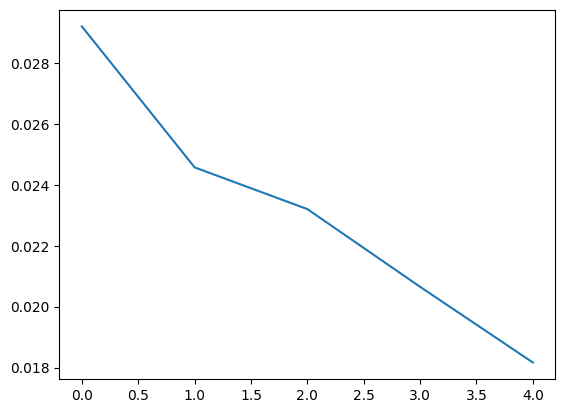

In [59]:
plt.plot(history.history['loss'])

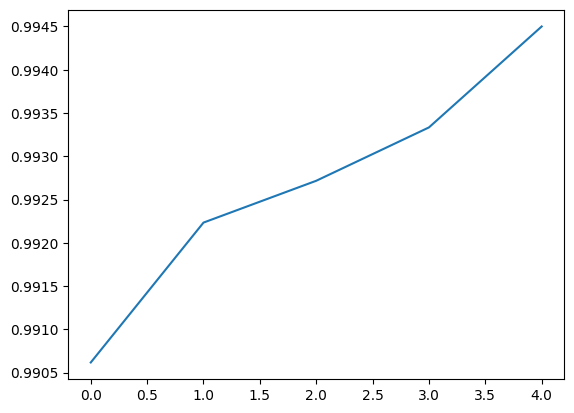

In [60]:
plt.plot(history.history['accuracy'])

In [61]:
loss, acc = model.evaluate(test_data, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.1233 - accuracy: 0.9779


In [62]:
loss

0.12332740426063538

In [63]:
acc

0.9779000282287598